In [1]:
#importing modules
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [23]:
#Setting up basic parameters for bootstrap
N = 1000 #Initial sample size
B = 500 #number of bootstrap sample ie replication. 
m = 3 #True mean of the data
s = 2 #True standard deviation of the data. 

In [3]:
data = sps.norm.rvs(size=N, loc=m, scale=s) #generating the random sample from normality. 

In [4]:
mhat = sps.tmean(data) #calculate sample mean estimate. 
shat2 = sps.tvar(data) #calcualte sample variance estimate. 

In [5]:
print(mhat,shat2)

(3.0580854569106521, 3.9379170528756577)


In [6]:
bootsample = [npr.choice(data,size=N,replace=True) for i in range(0,B)] #generate B bootstrap samples. 

In [9]:
np.array(bootsample).shape

(500, 1000)

In [22]:
bootmean = [sps.tmean(j) for j in bootsample] #calcualte the mean of each bootstrap sample.

(array([  4.,   1.,   0.,   2.,   2.,   1.,   7.,   7.,   9.,   7.,   9.,
         10.,  18.,   9.,  18.,   5.,  30.,  22.,  30.,  15.,  20.,  28.,
         29.,  20.,  19.,  19.,  28.,  13.,  20.,  13.,  15.,  11.,  14.,
         13.,   5.,   1.,   9.,   5.,   4.,   1.,   2.,   2.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2.89259713,  2.9001688 ,  2.90774048,  2.91531216,  2.92288384,
         2.93045551,  2.93802719,  2.94559887,  2.95317055,  2.96074222,
         2.9683139 ,  2.97588558,  2.98345726,  2.99102893,  2.99860061,
         3.00617229,  3.01374397,  3.02131565,  3.02888732,  3.036459  ,
         3.04403068,  3.05160236,  3.05917403,  3.06674571,  3.07431739,
         3.08188907,  3.08946074,  3.09703242,  3.1046041 ,  3.11217578,
         3.11974745,  3.12731913,  3.13489081,  3.14246249,  3.15003416,
         3.15760584,  3.16517752,  3.1727492 ,  3.18032087,  3.18789255,
         3.19546423,  3.20303591,  3.21060758,  3.21817926,  3.22575094,
 

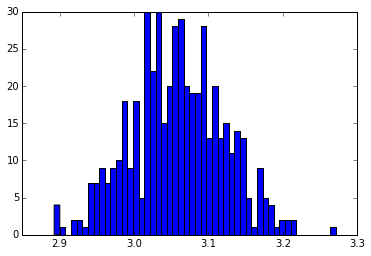

In [14]:
plt.hist(bootmean,bins=int(B/10))

In [25]:
#putting the result into a Pandas dataframe for pretty printing
columns = ['True', 'Estimated', 'Bootstrap']
index = ['mean', 'variance']
result = [[m,mhat,sps.tmean(bootmean)], [np.power(s,2)/float(N), shat2/N, sps.tvar(bootmean)]]
result = np.array(result)
resultpd = pd.DataFrame(result, columns=columns, index=index)
print(resultpd)

           True  Estimated  Bootstrap
mean      3.000   3.058085   3.058301
variance  0.004   0.003938   0.003927
